In [85]:
import warnings
warnings.filterwarnings("ignore")

In [136]:
import pandas as pd
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)  # show all columns

pd.set_option('display.max_rows', None)

In [87]:
# define column names for easy indexing
index_names = ['unit_num', 'time_cycles']
setting_names = ['setting1', 'setting2', 'setting3']
sensor_names = ['sensor{}'.format(i) for i in range(1, 22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv('./data/train_FD001.txt', sep='\s+', header=None, names=col_names)
test = pd.read_csv('./data/test_FD001.txt', sep='\s+', header=None, names=col_names)
y_test = pd.read_csv('./data/RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])

# inspect first few rows
train.head()

,unit_num,time_cycles,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [88]:
print("Train shape", train.shape)
print("Test shape", test.shape)
print("y_test shape", y_test.shape)

Train shape (20631, 26)
Test shape (13096, 26)
y_test shape (100, 1)


In [89]:
test.head()

,unit_num,time_cycles,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [90]:
del_cols = ["setting1", "setting2", "setting3"]
del_cols += ["sensor1", "sensor5", "sensor10", "sensor16", "sensor18", "sensor19"]

In [91]:
X_train = train.drop(del_cols, axis=1)

In [92]:
X_train.head()

,unit_num,time_cycles,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [93]:
SCALING = False

# Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same
X_test = test.drop(del_cols, axis=1)

if SCALING:
    scaler = StandardScaler()
    X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

X_train.shape, X_test.shape

((20631, 17), (13096, 17))

In [94]:
train.head()

,unit_num,time_cycles,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [95]:
print("The number of units: ", len(train.unit_num.unique().tolist()))

The number of units:  100


In [96]:
train.shape

(20631, 26)

In [97]:
cols_to_remove = ['unit_num', 'time_cycles']
sensor_columns  = [x for x in X_train.columns.tolist() if x not in cols_to_remove]
sensor_columns

['sensor2',
 'sensor3',
 'sensor4',
 'sensor6',
 'sensor7',
 'sensor8',
 'sensor9',
 'sensor11',
 'sensor12',
 'sensor13',
 'sensor14',
 'sensor15',
 'sensor17',
 'sensor20',
 'sensor21']

In [98]:
def transform_perc(data, window_sizes=[1]):
    cols_to_iterate = data.columns.tolist()

    for col in cols_to_iterate:
        for window_size in window_sizes:
            if col in ['unit_num', 'time_cycles', 'breakdown']:
                continue
            lag_col_name = f'{col}_lag{window_size}'
            perc_col_name = f"{col}_perc{window_size}"
            # create a new column that shifts the values by one row
            data[lag_col_name] = data.groupby('unit_num').apply(
                lambda x: x.sort_values('time_cycles', ascending=True))[col].shift(window_size)

            # calculate the percentage change
            data[perc_col_name] = (data[col] - data[lag_col_name]) / data[lag_col_name] * 100
            data = data.drop([lag_col_name], axis=1)
    return data, cols_to_iterate

window_sizes=[1, 2, 3, 4, 5]
X_train_perc, cols_iterated = transform_perc(X_train, window_sizes=window_sizes)
X_test_perc, cols_iterated = transform_perc(X_test, window_sizes=window_sizes)

In [99]:
X_train_perc = X_train_perc.dropna()

In [100]:
X_train_perc[['sensor2', 'sensor3']].mean(axis=1)

5        1113.285
6        1117.400
7        1112.760
8        1116.550
9        1116.475
           ...   
20626    1120.735
20627    1124.020
20628    1122.940
20629    1124.245
20630    1122.115
Length: 20626, dtype: float64

In [101]:
X_train_perc.head()

,unit_num,time_cycles,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,sensor2_perc1,sensor2_perc2,sensor2_perc3,sensor2_perc4,sensor2_perc5,sensor3_perc1,sensor3_perc2,sensor3_perc3,sensor3_perc4,sensor3_perc5,sensor4_perc1,sensor4_perc2,sensor4_perc3,sensor4_perc4,sensor4_perc5,sensor6_perc1,sensor6_perc2,sensor6_perc3,sensor6_perc4,sensor6_perc5,sensor7_perc1,sensor7_perc2,sensor7_perc3,sensor7_perc4,sensor7_perc5,sensor8_perc1,sensor8_perc2,sensor8_perc3,sensor8_perc4,sensor8_perc5,sensor9_perc1,sensor9_perc2,sensor9_perc3,sensor9_perc4,sensor9_perc5,sensor11_perc1,sensor11_perc2,sensor11_perc3,sensor11_perc4,sensor11_perc5,sensor12_perc1,sensor12_perc2,sensor12_perc3,sensor12_perc4,sensor12_perc5,sensor13_perc1,sensor13_perc2,sensor13_perc3,sensor13_perc4,sensor13_perc5,sensor14_perc1,sensor14_perc2,sensor14_perc3,sensor14_perc4,sensor14_perc5,sensor15_perc1,sensor15_perc2,sensor15_perc3,sensor15_perc4,sensor15_perc5,sensor17_perc1,sensor17_perc2,sensor17_perc3,sensor17_perc4,sensor17_perc5,sensor20_perc1,sensor20_perc2,sensor20_perc3,sensor20_perc4,sensor20_perc5,sensor21_perc1,sensor21_perc2,sensor21_perc3,sensor21_perc4,sensor21_perc5
5,1,6,642.10,1584.47,1398.37,21.61,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669,-0.042032,-0.038920,-0.038920,-0.007786,0.043626,0.102347,0.106142,-0.221664,-0.461736,-0.328993,-0.558234,-0.249667,-0.415183,-0.339952,-0.159217,0.0,0.0,0.0,0.0,0.0,0.120939,0.039679,0.073973,0.166140,0.055920,-0.001675,-0.003769,-0.002512,-0.000838,-0.001675,-0.060408,0.002210,-0.036010,0.062030,0.038580,-0.253807,0.063654,-0.232706,-0.694883,-0.653044,-0.097666,-0.225682,-0.141648,-0.114881,0.003834,-0.000419,-0.002094,0.000000,-0.001675,0.000419,-0.011680,-0.012048,-0.004672,0.016725,-0.070897,-0.220656,0.509070,-0.083157,-0.249057,-0.103332,-0.508906,-0.255102,0.256410,-0.255102,-0.255102,0.205656,0.257202,0.077022,-0.051282,-0.204813,-0.160226,-0.029948,0.097240,-0.242064,-0.222469
6,1,7,642.48,1592.32,1397.77,21.61,554.34,2388.02,9059.13,47.36,522.32,2388.03,8132.32,8.3974,392,39.10,23.3774,0.059181,0.017124,0.020238,0.020238,0.051390,0.495434,0.598288,0.602101,0.272672,0.031411,-0.042907,-0.600902,-0.292466,-0.457912,-0.382713,0.0,0.0,0.0,0.0,0.0,-0.059495,0.061372,-0.019839,0.014434,0.106546,0.000000,-0.001675,-0.003769,-0.002512,-0.000838,0.104424,0.043953,0.106636,0.068376,0.166518,0.424088,0.169205,0.488012,0.190396,-0.273742,0.122681,0.024895,-0.103278,-0.019142,0.007659,0.000000,-0.000419,-0.002094,0.000000,-0.001675,-0.006517,-0.018196,-0.018564,-0.011189,0.010207,-0.159319,-0.379624,0.348940,-0.242344,-0.407979,0.255754,-0.254453,0.000000,0.512821,0.000000,0.307850,0.514139,0.565844,0.385109,0.256410,0.044935,-0.115363,0.014974,0.142219,-0.197237
7,1,8,642.56,1582.96,1400.97,21.61,553.85,2388.00,9040.80,47.24,522.47,2388.03,8131.07,8.4076,391,38.97,23.3106,0.012452,0.071640,0.029578,0.032692,0.032692,-0.587822,-0.095300,0.006949,0.010741,-0.316753,0.228936,0.185931,-0.373341,-0.064200,-0.230024,0.0,0.0,0.0,0.0,0.0,-0.088393,-0.147836,-0.027076,-0.108215,-0.073973,-0.000838,-0.000838,-0.002512,-0.004606,-0.003350,-0.202337,-0.098125,-0.158473,-0.095917,-0.134100,-0.253378,0.169635,-0.084602,0.233397,-0.063465,0.028718,0.151434,0.053620,-0.074590,0.009571,0.000000,0.000000,-0.000419,-0.002094,0.000000,-0.015371,-0.021887,-0.033564,-0.033932,-0.026558,0.121466,-0.038046,-0.258619,0.470830,-0.121172,-0.255102,0.000000,-0.508906,-0.255102,0.256410,-0.332481,-0.025654,0.179949,0.231481,0.051348,-0.285746,-0.240939,-0.400779,-0.270815,-0.143933
8,1,9,642.12,1590.98,1394.80,21.61,553.69,2388.05,9046.46,47.29,521.79,2388.05,8125.69,8.3728,392,39.05,23.4066,-0.068476,-0.056033,0.003115,-0.038918,-0.035806,0.506646,-0.084154,0.410863,0.513630,0.517441,-0.440409,-0.212481,-0.255297,-0.812106,-0.504326,0.0,0.0,0.0,0.0,0.0,-0.028889,-0.117257,-0.176682,-0.055957,-0.137073,0.002094,0.001256,0.001256

In [102]:
def calculate_perc_avg_diff(data, cols_to_iterate, target_window_size, window_sizes):
    for sensor in cols_to_iterate:
        if sensor in ['unit_num', 'time_cycles', 'breakdown']:
            continue
        perc_col_names = [f"{sensor}_perc{window_size}" for window_size in window_sizes]
        
        # average of percentage changes
        perc_avg_col_name = f"{sensor}_perc_avg_{min(window_sizes)}_{max(window_sizes)}"
        data[perc_avg_col_name] = data[perc_col_names].mean(axis=1)
                
        # difference between the last percentage change and the average of percentage changes 
        # in the last len(window_sizes) time cycles.
        target_perc_column = f"{sensor}_perc{target_window_size}"
        perc_diff_col_name = f"{sensor}_perc_{min(window_sizes)}_diff_avg_{min(window_sizes)}_{max(window_sizes)}"
        data[perc_diff_col_name] =  data[target_perc_column] - data[perc_avg_col_name]
    return data

X_train_final= calculate_perc_avg_diff(X_train_perc, target_window_size=1,
                                                     cols_to_iterate=cols_iterated,
                                                     window_sizes=window_sizes)
X_test_final= calculate_perc_avg_diff(X_test_perc,   target_window_size=1,
                                                     cols_to_iterate=cols_iterated,
                                                     window_sizes=window_sizes)  

In [103]:
X_train_final = X_train_final.dropna()

In [104]:
X_train_final.head()

,unit_num,time_cycles,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,sensor2_perc1,sensor2_perc2,sensor2_perc3,sensor2_perc4,sensor2_perc5,sensor3_perc1,sensor3_perc2,sensor3_perc3,sensor3_perc4,sensor3_perc5,sensor4_perc1,sensor4_perc2,sensor4_perc3,sensor4_perc4,sensor4_perc5,sensor6_perc1,sensor6_perc2,sensor6_perc3,sensor6_perc4,sensor6_perc5,sensor7_perc1,sensor7_perc2,sensor7_perc3,sensor7_perc4,sensor7_perc5,sensor8_perc1,sensor8_perc2,sensor8_perc3,sensor8_perc4,sensor8_perc5,sensor9_perc1,sensor9_perc2,sensor9_perc3,sensor9_perc4,sensor9_perc5,sensor11_perc1,sensor11_perc2,sensor11_perc3,sensor11_perc4,sensor11_perc5,sensor12_perc1,sensor12_perc2,sensor12_perc3,sensor12_perc4,sensor12_perc5,sensor13_perc1,sensor13_perc2,sensor13_perc3,sensor13_perc4,sensor13_perc5,sensor14_perc1,sensor14_perc2,sensor14_perc3,sensor14_perc4,sensor14_perc5,sensor15_perc1,sensor15_perc2,sensor15_perc3,sensor15_perc4,sensor15_perc5,sensor17_perc1,sensor17_perc2,sensor17_perc3,sensor17_perc4,sensor17_perc5,sensor20_perc1,sensor20_perc2,sensor20_perc3,sensor20_perc4,sensor20_perc5,sensor21_perc1,sensor21_perc2,sensor21_perc3,sensor21_perc4,sensor21_perc5,sensor2_perc_avg_1_5,sensor2_perc_1_diff_avg_1_5,sensor3_perc_avg_1_5,sensor3_perc_1_diff_avg_1_5,sensor4_perc_avg_1_5,sensor4_perc_1_diff_avg_1_5,sensor6_perc_avg_1_5,sensor6_perc_1_diff_avg_1_5,sensor7_perc_avg_1_5,sensor7_perc_1_diff_avg_1_5,sensor8_perc_avg_1_5,sensor8_perc_1_diff_avg_1_5,sensor9_perc_avg_1_5,sensor9_perc_1_diff_avg_1_5,sensor11_perc_avg_1_5,sensor11_perc_1_diff_avg_1_5,sensor12_perc_avg_1_5,sensor12_perc_1_diff_avg_1_5,sensor13_perc_avg_1_5,sensor13_perc_1_diff_avg_1_5,sensor14_perc_avg_1_5,sensor14_perc_1_diff_avg_1_5,sensor15_perc_avg_1_5,sensor15_perc_1_diff_avg_1_5,sensor17_perc_avg_1_5,sensor17_perc_1_diff_avg_1_5,sensor20_perc_avg_1_5,sensor20_perc_1_diff_avg_1_5,sensor21_perc_avg_1_5,sensor21_perc_1_diff_avg_1_5
5,1,6,642.10,1584.47,1398.37,21.61,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669,-0.042032,-0.038920,-0.038920,-0.007786,0.043626,0.102347,0.106142,-0.221664,-0.461736,-0.328993,-0.558234,-0.249667,-0.415183,-0.339952,-0.159217,0.0,0.0,0.0,0.0,0.0,0.120939,0.039679,0.073973,0.166140,0.055920,-0.001675,-0.003769,-0.002512,-0.000838,-0.001675,-0.060408,0.002210,-0.036010,0.062030,0.038580,-0.253807,0.063654,-0.232706,-0.694883,-0.653044,-0.097666,-0.225682,-0.141648,-0.114881,0.003834,-0.000419,-0.002094,0.000000,-0.001675,0.000419,-0.011680,-0.012048,-0.004672,0.016725,-0.070897,-0.220656,0.509070,-0.083157,-0.249057,-0.103332,-0.508906,-0.255102,0.256410,-0.255102,-0.255102,0.205656,0.257202,0.077022,-0.051282,-0.204813,-0.160226,-0.029948,0.097240,-0.242064,-0.222469,-0.016806,-0.025226,-0.160781,0.263128,-0.344451,-0.213784,0.0,0.0,0.091330,0.029609,-0.002094,0.000419,0.001280,-0.061688,-0.354157,0.100350,-0.115209,0.017543,-0.000754,0.000335,-0.016514,0.004835,-0.029426,-0.191230,-0.203560,-0.305346,0.056757,0.148899,-0.111493,-0.048733
6,1,7,642.48,1592.32,1397.77,21.61,554.34,2388.02,9059.13,47.36,522.32,2388.03,8132.32,8.3974,392,39.10,23.3774,0.059181,0.017124,0.020238,0.020238,0.051390,0.495434,0.598288,0.602101,0.272672,0.031411,-0.042907,-0.600902,-0.292466,-0.457912,-0.382713,0.0,0.0,0.0,0.0,0.0,-0.059495,0.061372,-0.019839,0.014434,0.106546,0.000000,-0.001675,-0.003769,-0.002512,-0.000838,0.104424,0.043953,0.106636,0.068376,0.166518,0.424088,0.169205,0.488012,0.190396,-0.273742,0.122681,0.024895,-0.103278,-0.019142,0.007659,0.000000,-0.000419,-0.002094,0.000000,-0.001675,-0.006517,-0.018196,-0.018564,-0.011189,0.010207,-0.159319,-0.379624,0.348940,-0.242344,-0.407979,0.255754,-0.254453,0.000000,0.512821,0.000000,0.307850,0.514139,0.565844,0.385109,0.256410,0.044935,-0.115363,0.014974,0.142219,-0.197237,0.033634,0.025547,0.399981,0.095453,-0.355380,0.312473,0.0,0.0,0.020603,-0.080098,-0.001759,0.001759,0.097981,0.006442,0.199592,0.22

In [105]:
cols_to_plot = ['sensor2_perc1', 'sensor3_perc1', 'sensor4_perc1', 'sensor6_perc1',
       'sensor7_perc1', 'sensor8_perc1', 'sensor9_perc1', 'sensor11_perc1',
       'sensor12_perc1', 'sensor13_perc1', 'sensor14_perc1', 'sensor15_perc1',
       'sensor17_perc1', 'sensor20_perc1', 'sensor21_perc1']

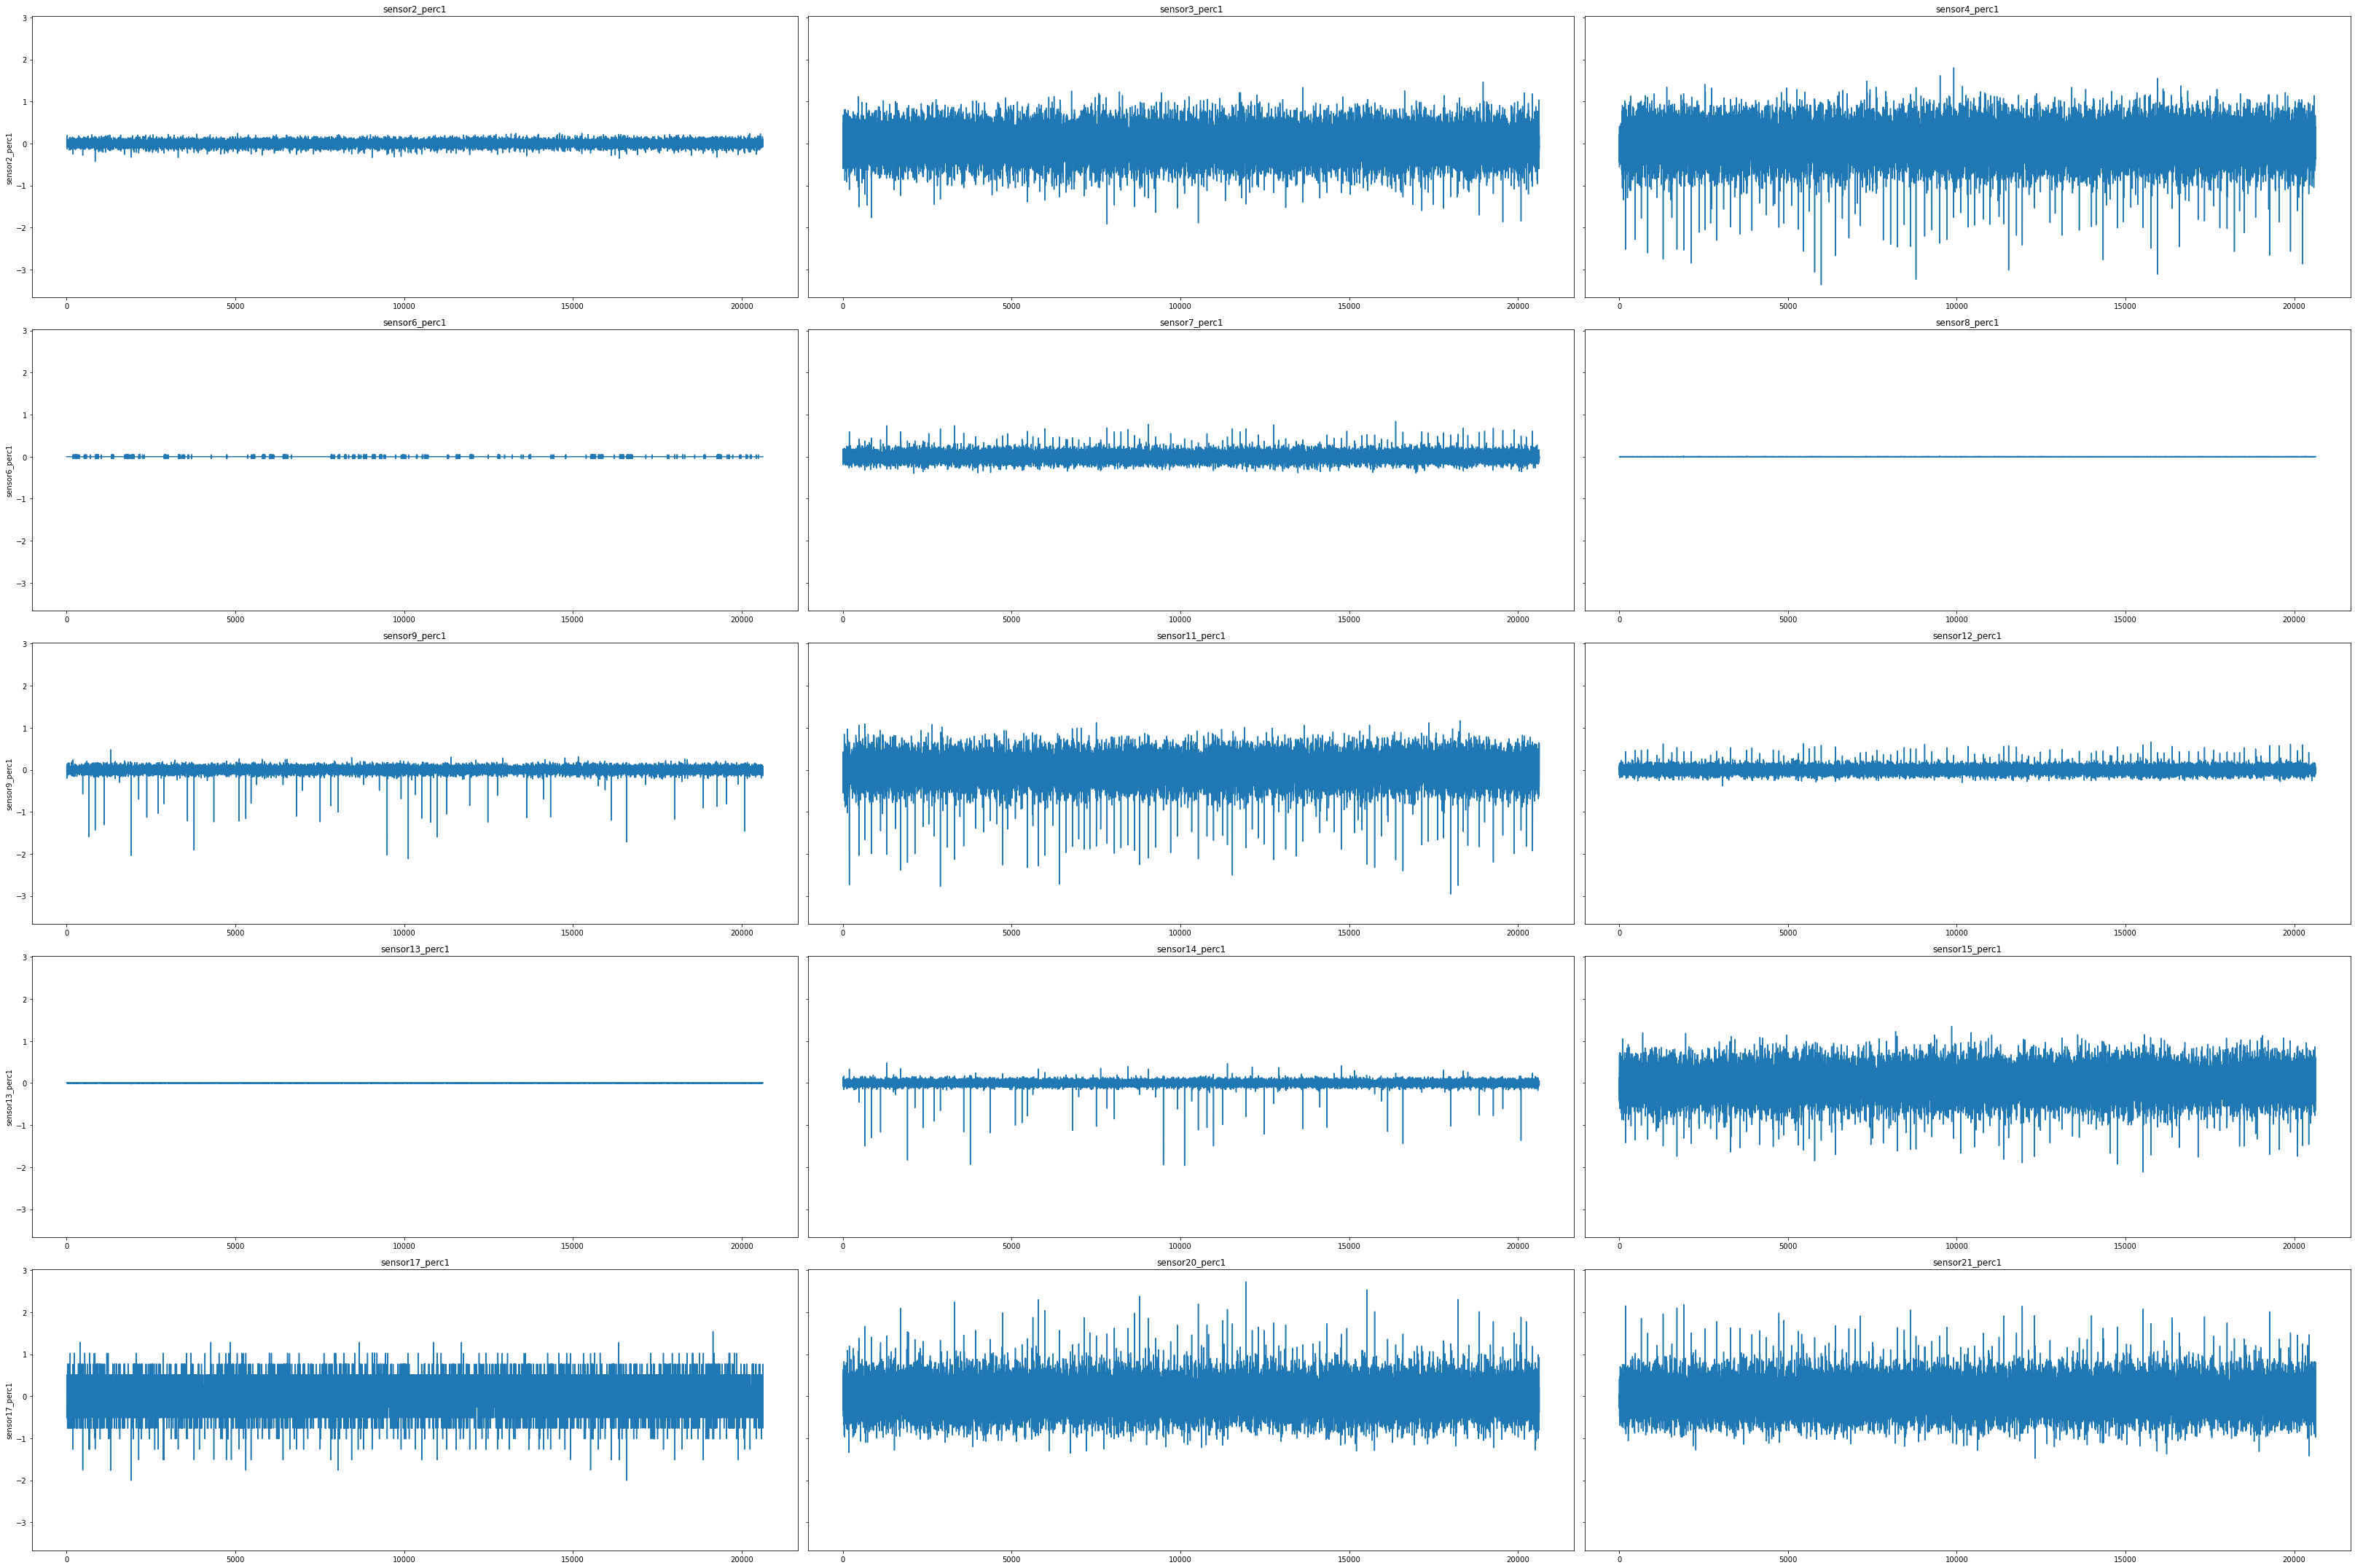

In [106]:
# Set the figure size
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(45,30), sharey=True)

# Create a line plot for each column
for col, ax in zip(cols_to_plot, axs.flatten()):
    sns.lineplot(data=X_train_perc[col], ax=ax)
    ax.set_title(col)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

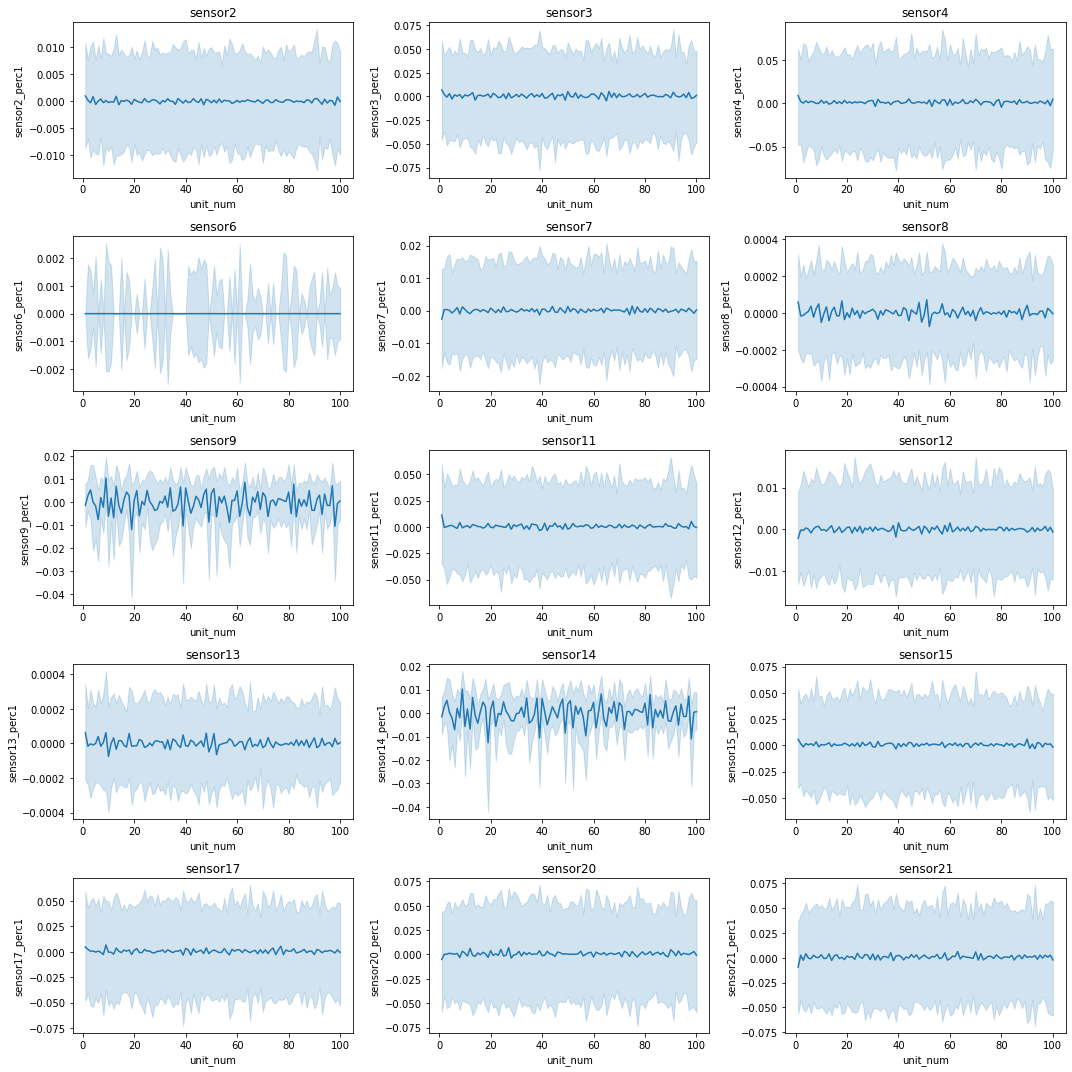

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

machinery_column = 'unit_num'

# Set the figure size
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15,15))

# Create a line plot for each column and machinery combination
for col, ax in zip(cols_to_plot, axs.flatten()):
    sns.lineplot(data=X_train_perc, x=machinery_column, y=col, ax=ax)
    ax.set_title(col.split("_")[0])
    

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


# Modeling

### Prepare data for modeling

In [108]:
X_train_final.head()

,unit_num,time_cycles,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,sensor2_perc1,sensor2_perc2,sensor2_perc3,sensor2_perc4,sensor2_perc5,sensor3_perc1,sensor3_perc2,sensor3_perc3,sensor3_perc4,sensor3_perc5,sensor4_perc1,sensor4_perc2,sensor4_perc3,sensor4_perc4,sensor4_perc5,sensor6_perc1,sensor6_perc2,sensor6_perc3,sensor6_perc4,sensor6_perc5,sensor7_perc1,sensor7_perc2,sensor7_perc3,sensor7_perc4,sensor7_perc5,sensor8_perc1,sensor8_perc2,sensor8_perc3,sensor8_perc4,sensor8_perc5,sensor9_perc1,sensor9_perc2,sensor9_perc3,sensor9_perc4,sensor9_perc5,sensor11_perc1,sensor11_perc2,sensor11_perc3,sensor11_perc4,sensor11_perc5,sensor12_perc1,sensor12_perc2,sensor12_perc3,sensor12_perc4,sensor12_perc5,sensor13_perc1,sensor13_perc2,sensor13_perc3,sensor13_perc4,sensor13_perc5,sensor14_perc1,sensor14_perc2,sensor14_perc3,sensor14_perc4,sensor14_perc5,sensor15_perc1,sensor15_perc2,sensor15_perc3,sensor15_perc4,sensor15_perc5,sensor17_perc1,sensor17_perc2,sensor17_perc3,sensor17_perc4,sensor17_perc5,sensor20_perc1,sensor20_perc2,sensor20_perc3,sensor20_perc4,sensor20_perc5,sensor21_perc1,sensor21_perc2,sensor21_perc3,sensor21_perc4,sensor21_perc5,sensor2_perc_avg_1_5,sensor2_perc_1_diff_avg_1_5,sensor3_perc_avg_1_5,sensor3_perc_1_diff_avg_1_5,sensor4_perc_avg_1_5,sensor4_perc_1_diff_avg_1_5,sensor6_perc_avg_1_5,sensor6_perc_1_diff_avg_1_5,sensor7_perc_avg_1_5,sensor7_perc_1_diff_avg_1_5,sensor8_perc_avg_1_5,sensor8_perc_1_diff_avg_1_5,sensor9_perc_avg_1_5,sensor9_perc_1_diff_avg_1_5,sensor11_perc_avg_1_5,sensor11_perc_1_diff_avg_1_5,sensor12_perc_avg_1_5,sensor12_perc_1_diff_avg_1_5,sensor13_perc_avg_1_5,sensor13_perc_1_diff_avg_1_5,sensor14_perc_avg_1_5,sensor14_perc_1_diff_avg_1_5,sensor15_perc_avg_1_5,sensor15_perc_1_diff_avg_1_5,sensor17_perc_avg_1_5,sensor17_perc_1_diff_avg_1_5,sensor20_perc_avg_1_5,sensor20_perc_1_diff_avg_1_5,sensor21_perc_avg_1_5,sensor21_perc_1_diff_avg_1_5
5,1,6,642.10,1584.47,1398.37,21.61,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669,-0.042032,-0.038920,-0.038920,-0.007786,0.043626,0.102347,0.106142,-0.221664,-0.461736,-0.328993,-0.558234,-0.249667,-0.415183,-0.339952,-0.159217,0.0,0.0,0.0,0.0,0.0,0.120939,0.039679,0.073973,0.166140,0.055920,-0.001675,-0.003769,-0.002512,-0.000838,-0.001675,-0.060408,0.002210,-0.036010,0.062030,0.038580,-0.253807,0.063654,-0.232706,-0.694883,-0.653044,-0.097666,-0.225682,-0.141648,-0.114881,0.003834,-0.000419,-0.002094,0.000000,-0.001675,0.000419,-0.011680,-0.012048,-0.004672,0.016725,-0.070897,-0.220656,0.509070,-0.083157,-0.249057,-0.103332,-0.508906,-0.255102,0.256410,-0.255102,-0.255102,0.205656,0.257202,0.077022,-0.051282,-0.204813,-0.160226,-0.029948,0.097240,-0.242064,-0.222469,-0.016806,-0.025226,-0.160781,0.263128,-0.344451,-0.213784,0.0,0.0,0.091330,0.029609,-0.002094,0.000419,0.001280,-0.061688,-0.354157,0.100350,-0.115209,0.017543,-0.000754,0.000335,-0.016514,0.004835,-0.029426,-0.191230,-0.203560,-0.305346,0.056757,0.148899,-0.111493,-0.048733
6,1,7,642.48,1592.32,1397.77,21.61,554.34,2388.02,9059.13,47.36,522.32,2388.03,8132.32,8.3974,392,39.10,23.3774,0.059181,0.017124,0.020238,0.020238,0.051390,0.495434,0.598288,0.602101,0.272672,0.031411,-0.042907,-0.600902,-0.292466,-0.457912,-0.382713,0.0,0.0,0.0,0.0,0.0,-0.059495,0.061372,-0.019839,0.014434,0.106546,0.000000,-0.001675,-0.003769,-0.002512,-0.000838,0.104424,0.043953,0.106636,0.068376,0.166518,0.424088,0.169205,0.488012,0.190396,-0.273742,0.122681,0.024895,-0.103278,-0.019142,0.007659,0.000000,-0.000419,-0.002094,0.000000,-0.001675,-0.006517,-0.018196,-0.018564,-0.011189,0.010207,-0.159319,-0.379624,0.348940,-0.242344,-0.407979,0.255754,-0.254453,0.000000,0.512821,0.000000,0.307850,0.514139,0.565844,0.385109,0.256410,0.044935,-0.115363,0.014974,0.142219,-0.197237,0.033634,0.025547,0.399981,0.095453,-0.355380,0.312473,0.0,0.0,0.020603,-0.080098,-0.001759,0.001759,0.097981,0.006442,0.199592,0.22

In [109]:
X_test_final

,unit_num,time_cycles,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,sensor2_perc1,sensor2_perc2,sensor2_perc3,sensor2_perc4,sensor2_perc5,sensor3_perc1,sensor3_perc2,sensor3_perc3,sensor3_perc4,sensor3_perc5,sensor4_perc1,sensor4_perc2,sensor4_perc3,sensor4_perc4,sensor4_perc5,sensor6_perc1,sensor6_perc2,sensor6_perc3,sensor6_perc4,sensor6_perc5,sensor7_perc1,sensor7_perc2,sensor7_perc3,sensor7_perc4,sensor7_perc5,sensor8_perc1,sensor8_perc2,sensor8_perc3,sensor8_perc4,sensor8_perc5,sensor9_perc1,sensor9_perc2,sensor9_perc3,sensor9_perc4,sensor9_perc5,sensor11_perc1,sensor11_perc2,sensor11_perc3,sensor11_perc4,sensor11_perc5,sensor12_perc1,sensor12_perc2,sensor12_perc3,sensor12_perc4,sensor12_perc5,sensor13_perc1,sensor13_perc2,sensor13_perc3,sensor13_perc4,sensor13_perc5,sensor14_perc1,sensor14_perc2,sensor14_perc3,sensor14_perc4,sensor14_perc5,sensor15_perc1,sensor15_perc2,sensor15_perc3,sensor15_perc4,sensor15_perc5,sensor17_perc1,sensor17_perc2,sensor17_perc3,sensor17_perc4,sensor17_perc5,sensor20_perc1,sensor20_perc2,sensor20_perc3,sensor20_perc4,sensor20_perc5,sensor21_perc1,sensor21_perc2,sensor21_perc3,sensor21_perc4,sensor21_perc5,sensor2_perc_avg_1_5,sensor2_perc_1_diff_avg_1_5,sensor3_perc_avg_1_5,sensor3_perc_1_diff_avg_1_5,sensor4_perc_avg_1_5,sensor4_perc_1_diff_avg_1_5,sensor6_perc_avg_1_5,sensor6_perc_1_diff_avg_1_5,sensor7_perc_avg_1_5,sensor7_perc_1_diff_avg_1_5,sensor8_perc_avg_1_5,sensor8_perc_1_diff_avg_1_5,sensor9_perc_avg_1_5,sensor9_perc_1_diff_avg_1_5,sensor11_perc_avg_1_5,sensor11_perc_1_diff_avg_1_5,sensor12_perc_avg_1_5,sensor12_perc_1_diff_avg_1_5,sensor13_perc_avg_1_5,sensor13_perc_1_diff_avg_1_5,sensor14_perc_avg_1_5,sensor14_perc_1_diff_avg_1_5,sensor15_perc_avg_1_5,sensor15_perc_1_diff_avg_1_5,sensor17_perc_avg_1_5,sensor17_perc_1_diff_avg_1_5,sensor20_perc_avg_1_5,sensor20_perc_1_diff_avg_1_5,sensor21_perc_avg_1_5,sensor21_perc_1_diff_avg_1_5
0,1,1,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,-0.203726,NaN,NaN,NaN,NaN,0.199333,NaN,NaN,NaN,NaN,-0.199541,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.171511,NaN,NaN,NaN,NaN,-0.001256,NaN,NaN,NaN,NaN,0.046960,NaN,NaN,NaN,NaN,0.635593,NaN,NaN,NaN,NaN,0.084336,NaN,NaN,NaN,NaN,0.001256,NaN,NaN,NaN,NaN,0.173158,NaN,NaN,NaN,NaN,-0.296245,NaN,NaN,NaN,NaN,0.255102,NaN,NaN,NaN,NaN,0.411734,NaN,NaN,NaN,NaN,0.077438,NaN,NaN,NaN,NaN,-0.203726,0.000000,0.199333,0.000000,-0.199541,0.000000,0.0,0.0,0.171511,0.000000,-0.001256,0.000000,0.046960,0.000000,0.635593,0.000000,0.084336,0.000000,0.001256,0.000000,0.173158,0.000000,-0.296245,0.000000,0.255102,0.000000,0.411734,0.000000,0.077438,0.000000
2,1,3,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,0.116875,-0.087089,NaN,NaN,NaN,-0.095061,0.104082,NaN,NaN,NaN,0.424245,0.223858,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,-0.133369,0.037913,NaN,NaN,NaN,0.001675,0.000419,NaN,NaN,NaN,0.028053,0.075026,NaN,NaN,NaN,0.000000,0.635593,NaN,NaN,NaN,-0.036387,0.047918,NaN,NaN,NaN,-0.001256,0.000000,NaN,NaN,NaN,-0.116959,0.055996,NaN,NaN,NaN,0.761309,0.462809,NaN,NaN,NaN,0.000000,0.255102,NaN,NaN,NaN,0.153767,0.566135,NaN,NaN,NaN,0.106876,0.184397,NaN,NaN,NaN,0.014893,0.101982,0.004510,-0.099572,0.324051,0.100194,0.0,0.0,-0.047728,-0.085641,0.001047,0.000628,0.051539,-0.023487,0.317797,-0.317797,0.005766,-0.042153,-0.000628,-

In [110]:
X_train_final = X_train_final.dropna()
X_test_final = X_test_final.dropna()

In [111]:
X_train_final.reset_index(drop=True, inplace=True)
X_test_final.reset_index(drop=True, inplace=True)

In [112]:
X_train_final['breakdown'] = 0

idx_last_record = X_train_final.reset_index().groupby(by='unit_num')['index'].last()  # engines breakdown at the last cycle
# failure must be predicted 1 time cycle ahead to take action
X_train_final.loc[idx_last_record-1, 'breakdown'] = 1
X_train_final = X_train_final.drop(idx_last_record, axis=0)

In [113]:
X_test_final['breakdown'] = 0
idx_last_record = X_test_final.reset_index().groupby(by='unit_num')['index'].last()  # engines breakdown at the last cycle
# failure must be predicted 1 time cycle ahead to take action
X_test_final.loc[idx_last_record-1, 'breakdown'] = 1
X_test_final = X_test_final.drop(idx_last_record, axis=0)

In [114]:
cols_to_drop = sensor_columns + ['unit_num', 'time_cycles']
print("DROPPING: ", cols_to_drop)

X_train_final.drop(cols_to_drop, axis=1, inplace=True)
X_test_final.drop(cols_to_drop, axis=1, inplace=True)

DROPPING:  ['sensor2', 'sensor3', 'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21', 'unit_num', 'time_cycles']


In [115]:
X_train_final[X_train_final.breakdown != 0 ]

,sensor2_perc1,sensor2_perc2,sensor2_perc3,sensor2_perc4,sensor2_perc5,sensor3_perc1,sensor3_perc2,sensor3_perc3,sensor3_perc4,sensor3_perc5,sensor4_perc1,sensor4_perc2,sensor4_perc3,sensor4_perc4,sensor4_perc5,sensor6_perc1,sensor6_perc2,sensor6_perc3,sensor6_perc4,sensor6_perc5,sensor7_perc1,sensor7_perc2,sensor7_perc3,sensor7_perc4,sensor7_perc5,sensor8_perc1,sensor8_perc2,sensor8_perc3,sensor8_perc4,sensor8_perc5,sensor9_perc1,sensor9_perc2,sensor9_perc3,sensor9_perc4,sensor9_perc5,sensor11_perc1,sensor11_perc2,sensor11_perc3,sensor11_perc4,sensor11_perc5,sensor12_perc1,sensor12_perc2,sensor12_perc3,sensor12_perc4,sensor12_perc5,sensor13_perc1,sensor13_perc2,sensor13_perc3,sensor13_perc4,sensor13_perc5,sensor14_perc1,sensor14_perc2,sensor14_perc3,sensor14_perc4,sensor14_perc5,sensor15_perc1,sensor15_perc2,sensor15_perc3,sensor15_perc4,sensor15_perc5,sensor17_perc1,sensor17_perc2,sensor17_perc3,sensor17_perc4,sensor17_perc5,sensor20_perc1,sensor20_perc2,sensor20_perc3,sensor20_perc4,sensor20_perc5,sensor21_perc1,sensor21_perc2,sensor21_perc3,sensor21_perc4,sensor21_perc5,sensor2_perc_avg_1_5,sensor2_perc_1_diff_avg_1_5,sensor3_perc_avg_1_5,sensor3_perc_1_diff_avg_1_5,sensor4_perc_avg_1_5,sensor4_perc_1_diff_avg_1_5,sensor6_perc_avg_1_5,sensor6_perc_1_diff_avg_1_5,sensor7_perc_avg_1_5,sensor7_perc_1_diff_avg_1_5,sensor8_perc_avg_1_5,sensor8_perc_1_diff_avg_1_5,sensor9_perc_avg_1_5,sensor9_perc_1_diff_avg_1_5,sensor11_perc_avg_1_5,sensor11_perc_1_diff_avg_1_5,sensor12_perc_avg_1_5,sensor12_perc_1_diff_avg_1_5,sensor13_perc_avg_1_5,sensor13_perc_1_diff_avg_1_5,sensor14_perc_avg_1_5,sensor14_perc_1_diff_avg_1_5,sensor15_perc_avg_1_5,sensor15_perc_1_diff_avg_1_5,sensor17_perc_avg_1_5,sensor17_perc_1_diff_avg_1_5,sensor20_perc_avg_1_5,sensor20_perc_1_diff_avg_1_5,sensor21_perc_avg_1_5,sensor21_perc_1_diff_avg_1_5,breakdown
185,-0.046610,-0.130398,-0.063689,0.003109,-0.026418,0.196346,0.387803,-0.001248,0.644432,0.451365,-0.012623,-0.156862,0.210152,-0.105096,-0.037159,0.0,0.0,0.0,0.0,0.0,-0.067115,0.039949,-0.184803,-0.029034,-0.298605,-0.000419,0.000419,-0.001256,-0.000419,0.002931,0.024113,-0.019791,0.053663,0.055877,-0.095124,-0.372439,0.145591,0.312500,-0.165872,0.062344,-0.090378,-0.001925,-0.042325,0.007699,-0.098062,-0.002093,-0.001256,0.002931,0.000837,0.002094,0.025023,-0.035725,-0.037942,-0.013061,-0.108821,-0.057496,-0.010565,-0.038729,-0.051632,-0.062187,-1.005025,-0.253165,-0.505051,-0.505051,-0.755668,-0.103923,-0.077963,-0.155804,0.078084,-0.051989,0.268776,0.072687,0.743506,0.204920,0.317049,-0.052801,0.006191,0.335740,-0.139394,-0.020318,0.007694,0.0,0.0,-0.107921,0.040806,0.000251,-0.000670,0.003748,0.020366,-0.003575,-0.368864,-0.044998,-0.045380,0.000502,-0.002596,-0.034105,0.059128,-0.044122,-0.013374,-0.604792,-0.400233,-0.062319,-0.041604,0.321388,-0.052611,1
472,-0.035733,-0.072992,-0.052813,-0.077647,-0.024860,0.425215,0.142380,0.099873,0.317160,0.336618,-0.111797,-0.032866,-0.006995,0.189225,0.365778,0.0,0.0,0.0,0.0,0.0,0.137969,-0.063410,0.027201,-0.123124,0.030828,-0.000837,-0.001675,0.000837,-0.002094,0.000000,0.036709,0.133555,0.196827,0.107895,0.141157,-0.269318,-0.083022,-0.145198,-0.269318,-0.062279,-0.076936,-0.084624,-0.107678,-0.103836,0.005775,0.000000,0.000419,0.000837,0.001675,0.002931,0.062953,0.038448,-0.059695,0.018853,0.029385,-0.363670,-0.420912,-0.313384,-0.254847,-0.521218,-0.252525,0.000000,-0.753769,-0.503778,-0.753769,-0.156291,0.261575,-0.234253,-0.286160,-0.493250,-0.426554,-0.444212,-0.082046,-0.333853,-0.093756,-0.052809,0.017076,0.264249,0.160965,0.080669,-0.192466,0.0,0.0,0.001893,0.136076,-0.000754,-0.000084,0.123228,-0.086520,-0.165827,-0.103491,-0.073460,-0.003477,0.001172,-0.001172,0.017989,0.044964,-0.374806,0.011136,-0.452768,0.200243,-0.181676,0.025385,-0.276084,-0.150469,1
651,-0.003107,-0.041930,0.079297,0.031082,0.003107,0.330375,0.682498,0.172098,0.227094,0.107180,0.495258,-0.553350,0.447980,0.404270,0.935588,0.0,0.0,0.0,0.0,0.0,-0.155749,-0.112333,-0.029013,-0.177

### Fitting Logistic Regression

In [116]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import glm

In [132]:
feature_cols = X_train_final.columns.tolist()
feature_cols.remove('breakdown')

target_col = 'breakdown'
X = X_train_final[feature_cols]
y = X_train_final[target_col]

# Fit logistic regression model
formula = target_col + " ~ " + " + ".join(feature_cols)
model = glm(formula=formula, data=X_train_final, family=sm.families.Binomial()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              breakdown   No. Observations:                20526
Model:                            GLM   Df Residuals:                    20450
Model Family:                Binomial   Df Model:                           75
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -494.00
Date:                Mon, 06 Mar 2023   Deviance:                       988.00
Time:                        18:42:37   Pearson chi2:                 1.49e+04
No. Iterations:                   100   Pseudo R-squ. (CS):            0.01337
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [134]:
summary_df = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]

In [140]:
summary_df.rename({summary_df.columns.tolist()[3]:'p'}, axis=1, inplace=True)

In [142]:
summary_df[summary_df.p<0.1]

,coef,std err,z,p,[0.025,0.975]
Intercept,-7.0088,0.216,-32.423,0.000,-7.432,-6.585
sensor2_perc4,3.8611,2.010,1.921,0.055,-0.078,7.800
sensor3_perc3,-1.0411,0.374,-2.785,0.005,-1.774,-0.308
sensor3_perc5,0.8412,0.372,2.260,0.024,0.112,1.571
sensor4_perc2,-0.7366,0.322,-2.286,0.022,-1.368,-0.105
sensor4_perc5,0.6390,0.316,2.019,0.044,0.019,1.259
sensor8_perc1,-89.9667,42.268,-2.128,0.033,-172.810,-7.123
sensor8_perc2,-140.3001,74.561,-1.882,0.060,-286.438,5.837
sensor8_perc5,187.1177,73.006,2.563,0.010,44.028,330.207
sensor9_perc5,3.4998,1.958,1.787,0.074,-0.339,7.338


In [154]:
difference_columns = summary_df.index.tolist()[76:]
summary_df.iloc[76:]

,coef,std err,z,p,[0.025,0.975]
sensor2_perc_avg_1_5,0.7773,0.340,2.285,0.022,0.111,1.444
sensor2_perc_1_diff_avg_1_5,-2.3337,1.141,-2.045,0.041,-4.571,-0.097
sensor3_perc_avg_1_5,-0.0037,0.064,-0.058,0.954,-0.128,0.121
sensor3_perc_1_diff_avg_1_5,-0.0271,0.205,-0.132,0.895,-0.429,0.375
sensor4_perc_avg_1_5,0.0385,0.056,0.691,0.489,-0.071,0.148
sensor4_perc_1_diff_avg_1_5,0.1095,0.184,0.595,0.552,-0.251,0.470
sensor6_perc_avg_1_5,-0.6743,3.550,-0.190,0.849,-7.631,6.283
sensor6_perc_1_diff_avg_1_5,0.8946,11.259,0.079,0.937,-21.173,22.962
sensor7_perc_avg_1_5,-0.5226,0.214,-2.440,0.015,-0.942,-0.103
sensor7_perc_1_diff_avg_1_5,1.2427,0.690,1.801,0.072,-0.110,2.595


In [118]:
base_model_aic = model.aic
print(base_model_aic)

1140.0040935820007


In [119]:
from scipy.stats import chi2


# This could be made into a neat function of Hosmer-Lemeshow. 
def HosmerLemeshow (model,Y):
    pihat=model.predict()
    pihatcat=pd.cut(pihat, np.percentile(pihat,[0,25,50,75,100]),labels=False,include_lowest=True) #here we've chosen only 4 groups


    meanprobs =[0]*4 
    expevents =[0]*4
    obsevents =[0]*4 
    meanprobs2=[0]*4 
    expevents2=[0]*4
    obsevents2=[0]*4 

    for i in range(4):
        meanprobs[i]=np.mean(pihat[pihatcat==i])
        expevents[i]=np.sum(pihatcat==i)*np.array(meanprobs[i])
        obsevents[i]=np.sum(Y[pihatcat==i])
        meanprobs2[i]=np.mean(1-pihat[pihatcat==i])
        expevents2[i]=np.sum(pihatcat==i)*np.array(meanprobs2[i])
        obsevents2[i]=np.sum(1-Y[pihatcat==i]) 


    data1={'meanprobs':meanprobs,'meanprobs2':meanprobs2}
    data2={'expevents':expevents,'expevents2':expevents2}
    data3={'obsevents':obsevents,'obsevents2':obsevents2}
    m=pd.DataFrame(data1)
    e=pd.DataFrame(data2)
    o=pd.DataFrame(data3)
    
    # The statistic for the test, which follows, under the null hypothesis,
    # The chi-squared distribution with degrees of freedom equal to amount of groups - 2. Thus 4 - 2 = 2
    tt=sum(sum((np.array(o)-np.array(e))**2/np.array(e))) 
    pvalue=1-chi2.cdf(tt,2)

    return pd.DataFrame([[chi2.cdf(tt,2).round(2), pvalue.round(2)]],columns = ["Chi2", "p - value"])
    
HosmerLemeshow(model,y)

,Chi2,p - value
0,0.51,0.49


In [120]:
# Assess feature importance
print("Feature importance:")
for i, col in enumerate(feature_cols):
    print(col, model.params[i+1])

Feature importance:
sensor2_perc1 -1.556405140972076
sensor2_perc2 -0.3851480511856075
sensor2_perc3 0.5249454013376385
sensor2_perc4 3.861108664040235
sensor2_perc5 1.4421961797290694
sensor3_perc1 -0.03075462291960029
sensor3_perc2 -0.11771488658075241
sensor3_perc3 -1.0411006519837582
sensor3_perc4 0.32992483249063076
sensor3_perc5 0.8411576895689203
sensor4_perc1 0.14804016671795348
sensor4_perc2 -0.7366445766135887
sensor4_perc3 0.1334751278619551
sensor4_perc4 0.008807408610772356
sensor4_perc5 0.6389509767322834
sensor6_perc1 0.22026190981168384
sensor6_perc2 -1.112783118811035
sensor6_perc3 -0.7495775754490827
sensor6_perc4 -0.4124776163939222
sensor6_perc5 -1.317134536449386
sensor7_perc1 0.7200511493163319
sensor7_perc2 -0.19791566000064553
sensor7_perc3 -0.5960821863993505
sensor7_perc4 -0.5007865263531611
sensor7_perc5 -2.038284331441425
sensor8_perc1 -89.966734702556
sensor8_perc2 -140.30009893728055
sensor8_perc3 112.19818558568637
sensor8_perc4 67.70325422395959
sensor8_

In [121]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[feature_cols], y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = model.predict(X_test)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

# Print the recall score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))


Accuracy: 0.9946419873356064
Confusion matrix:
[[4084    0]
 [  22    0]]
Precision: 0.9893126829709247
Recall: 0.9946419873356064


## Feature Elimination

In [122]:
X

,sensor2_perc1,sensor2_perc2,sensor2_perc3,sensor2_perc4,sensor2_perc5,sensor3_perc1,sensor3_perc2,sensor3_perc3,sensor3_perc4,sensor3_perc5,sensor4_perc1,sensor4_perc2,sensor4_perc3,sensor4_perc4,sensor4_perc5,sensor6_perc1,sensor6_perc2,sensor6_perc3,sensor6_perc4,sensor6_perc5,sensor7_perc1,sensor7_perc2,sensor7_perc3,sensor7_perc4,sensor7_perc5,sensor8_perc1,sensor8_perc2,sensor8_perc3,sensor8_perc4,sensor8_perc5,sensor9_perc1,sensor9_perc2,sensor9_perc3,sensor9_perc4,sensor9_perc5,sensor11_perc1,sensor11_perc2,sensor11_perc3,sensor11_perc4,sensor11_perc5,sensor12_perc1,sensor12_perc2,sensor12_perc3,sensor12_perc4,sensor12_perc5,sensor13_perc1,sensor13_perc2,sensor13_perc3,sensor13_perc4,sensor13_perc5,sensor14_perc1,sensor14_perc2,sensor14_perc3,sensor14_perc4,sensor14_perc5,sensor15_perc1,sensor15_perc2,sensor15_perc3,sensor15_perc4,sensor15_perc5,sensor17_perc1,sensor17_perc2,sensor17_perc3,sensor17_perc4,sensor17_perc5,sensor20_perc1,sensor20_perc2,sensor20_perc3,sensor20_perc4,sensor20_perc5,sensor21_perc1,sensor21_perc2,sensor21_perc3,sensor21_perc4,sensor21_perc5,sensor2_perc_avg_1_5,sensor2_perc_1_diff_avg_1_5,sensor3_perc_avg_1_5,sensor3_perc_1_diff_avg_1_5,sensor4_perc_avg_1_5,sensor4_perc_1_diff_avg_1_5,sensor6_perc_avg_1_5,sensor6_perc_1_diff_avg_1_5,sensor7_perc_avg_1_5,sensor7_perc_1_diff_avg_1_5,sensor8_perc_avg_1_5,sensor8_perc_1_diff_avg_1_5,sensor9_perc_avg_1_5,sensor9_perc_1_diff_avg_1_5,sensor11_perc_avg_1_5,sensor11_perc_1_diff_avg_1_5,sensor12_perc_avg_1_5,sensor12_perc_1_diff_avg_1_5,sensor13_perc_avg_1_5,sensor13_perc_1_diff_avg_1_5,sensor14_perc_avg_1_5,sensor14_perc_1_diff_avg_1_5,sensor15_perc_avg_1_5,sensor15_perc_1_diff_avg_1_5,sensor17_perc_avg_1_5,sensor17_perc_1_diff_avg_1_5,sensor20_perc_avg_1_5,sensor20_perc_1_diff_avg_1_5,sensor21_perc_avg_1_5,sensor21_perc_1_diff_avg_1_5
0,-0.042032,-0.038920,-0.038920,-0.007786,0.043626,0.102347,0.106142,-0.221664,-0.461736,-0.328993,-0.558234,-0.249667,-0.415183,-0.339952,-0.159217,0.0,0.0,0.0,0.0,0.0,0.120939,0.039679,0.073973,0.166140,0.055920,-0.001675,-0.003769,-0.002512,-0.000838,-0.001675,-0.060408,0.002210,-0.036010,0.062030,0.038580,-0.253807,0.063654,-0.232706,-0.694883,-0.653044,-0.097666,-0.225682,-0.141648,-0.114881,0.003834,-0.000419,-0.002094,0.000000,-0.001675,0.000419,-0.011680,-0.012048,-0.004672,0.016725,-0.070897,-0.220656,0.509070,-0.083157,-0.249057,-0.103332,-0.508906,-0.255102,0.256410,-0.255102,-0.255102,0.205656,0.257202,0.077022,-0.051282,-0.204813,-0.160226,-0.029948,0.097240,-0.242064,-0.222469,-0.016806,-0.025226,-0.160781,0.263128,-0.344451,-0.213784,0.0,0.0,0.091330,0.029609,-0.002094,0.000419,0.001280,-0.061688,-0.354157,0.100350,-0.115209,0.017543,-0.000754,0.000335,-0.016514,0.004835,-0.029426,-0.191230,-0.203560,-0.305346,0.056757,0.148899,-0.111493,-0.048733
1,0.059181,0.017124,0.020238,0.020238,0.051390,0.495434,0.598288,0.602101,0.272672,0.031411,-0.042907,-0.600902,-0.292466,-0.457912,-0.382713,0.0,0.0,0.0,0.0,0.0,-0.059495,0.061372,-0.019839,0.014434,0.106546,0.000000,-0.001675,-0.003769,-0.002512,-0.000838,0.104424,0.043953,0.106636,0.068376,0.166518,0.424088,0.169205,0.488012,0.190396,-0.273742,0.122681,0.024895,-0.103278,-0.019142,0.007659,0.000000,-0.000419,-0.002094,0.000000,-0.001675,-0.006517,-0.018196,-0.018564,-0.011189,0.010207,-0.159319,-0.379624,0.348940,-0.242344,-0.407979,0.255754,-0.254453,0.000000,0.512821,0.000000,0.307850,0.514139,0.565844,0.385109,0.256410,0.044935,-0.115363,0.014974,0.142219,-0.197237,0.033634,0.025547,0.399981,0.095453,-0.355380,0.312473,0.0,0.0,0.020603,-0.080098,-0.001759,0.001759,0.097981,0.006442,0.199592,0.224496,0.006563,0.116118,-0.000837,0.000837,-0.008852,0.002335,-0.168065,0.008746,0.102824,0.152930,0.405870,-0.098020,-0.022094,0.067030
2,0.012452,0.071640,0.029578,0.032692,0.032692,-0.587822,-0.095300,0.006949,0.010741,-0.316753,0.228936,0.185931,-0.373341,-0.064200,-0.230024,0.0,0.0,0.0,0.0,0.0,-0.088393,-0.147836,-0.027076,-0.108215,-0.073973,-0.000838,-0.000838,

In [123]:
#5. Select features based on Recursive Feature Selection method
# RFECV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
rfe_estimator = "XGBoost"
rfe_step = 2
rfe_cv = 5
rfe_scoring = 'accuracy'

def rfecv_feature_selection(data, train_target, formula, rfe_step, rfe_cv, rfe_scoring):

    estimator_rfe = LogisticRegression(solver='liblinear')
    data = data.drop('breakdown', axis=1)
    rfecv = RFECV(estimator = estimator_rfe, step = rfe_step, cv = rfe_cv, scoring = rfe_scoring, 
                  min_features_to_select=30, n_jobs=12)
    rfecv.fit(data, train_target)
    # Select feature based on RFE
    print('Optimal number of features: {}'.format(rfecv.n_features_))
    rfe_df = pd.DataFrame(columns = ['Feature', 'rfe_filter'])
    rfe_df['Feature'] = data.columns
    rfe_df['rfe_filter'] = rfecv.support_.tolist()
    rfe_df_v2 = rfe_df[rfe_df['rfe_filter']==True]
    rfe_top_features = rfe_df_v2['Feature'].tolist()
    print(rfe_top_features)
    
    rfe_top_features_df = pd.DataFrame(rfe_top_features,columns = ['Feature'])
    rfe_top_features_df['Method'] = 'RFECV'
    return rfe_top_features_df,rfecv

formula = target_col + " ~ " + " + ".join(feature_cols)

rfe_top_features_df,rfecv = rfecv_feature_selection(data=X_train_final,
                                                     train_target = y,
                                                     formula=formula,
                                                     rfe_step=2,
                                                     rfe_cv=4,
                                                     rfe_scoring=rfe_scoring)
rfe_top_features_df.head(n=20)

Optimal number of features: 30
['sensor2_perc4', 'sensor2_perc5', 'sensor3_perc3', 'sensor3_perc5', 'sensor4_perc2', 'sensor4_perc5', 'sensor7_perc3', 'sensor7_perc5', 'sensor9_perc3', 'sensor9_perc4', 'sensor9_perc5', 'sensor11_perc5', 'sensor12_perc1', 'sensor12_perc3', 'sensor12_perc4', 'sensor12_perc5', 'sensor14_perc3', 'sensor14_perc4', 'sensor14_perc5', 'sensor15_perc5', 'sensor21_perc5', 'sensor2_perc_avg_1_5', 'sensor2_perc_1_diff_avg_1_5', 'sensor7_perc_1_diff_avg_1_5', 'sensor9_perc_avg_1_5', 'sensor9_perc_1_diff_avg_1_5', 'sensor11_perc_avg_1_5', 'sensor11_perc_1_diff_avg_1_5', 'sensor12_perc_1_diff_avg_1_5', 'sensor14_perc_1_diff_avg_1_5']


,Feature,Method
0,sensor2_perc4,RFECV
1,sensor2_perc5,RFECV
2,sensor3_perc3,RFECV
3,sensor3_perc5,RFECV
4,sensor4_perc2,RFECV
5,sensor4_perc5,RFECV
6,sensor7_perc3,RFECV
7,sensor7_perc5,RFECV
8,sensor9_perc3,RFECV
9,sensor9_perc4,RFECV


In [124]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=30, verbose=1)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with

In [125]:
feature_names = X.columns
selected_feature_names = feature_names[fit.support_].tolist()
selected_feature_names

['sensor2_perc4',
 'sensor2_perc5',
 'sensor3_perc3',
 'sensor3_perc5',
 'sensor4_perc2',
 'sensor4_perc5',
 'sensor7_perc3',
 'sensor7_perc5',
 'sensor9_perc3',
 'sensor9_perc4',
 'sensor9_perc5',
 'sensor11_perc5',
 'sensor12_perc1',
 'sensor12_perc3',
 'sensor12_perc4',
 'sensor12_perc5',
 'sensor14_perc3',
 'sensor14_perc4',
 'sensor14_perc5',
 'sensor15_perc5',
 'sensor21_perc5',
 'sensor2_perc_avg_1_5',
 'sensor2_perc_1_diff_avg_1_5',
 'sensor7_perc_1_diff_avg_1_5',
 'sensor9_perc_avg_1_5',
 'sensor9_perc_1_diff_avg_1_5',
 'sensor11_perc_avg_1_5',
 'sensor11_perc_1_diff_avg_1_5',
 'sensor12_perc_1_diff_avg_1_5',
 'sensor14_perc_1_diff_avg_1_5']

In [126]:
feature_cols = selected_feature_names

target_col = 'breakdown'
X = X_train_final[feature_cols]
y = X_train_final[target_col]

# Fit logistic regression model
formula = target_col + " ~ " + " + ".join(feature_cols)
model = glm(formula=formula, data=X_train_final, family=sm.families.Binomial()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              breakdown   No. Observations:                20526
Model:                            GLM   Df Residuals:                    20495
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -527.97
Date:                Mon, 06 Mar 2023   Deviance:                       1055.9
Time:                        18:42:10   Pearson chi2:                 1.61e+04
No. Iterations:                    10   Pseudo R-squ. (CS):            0.01010
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [127]:
deviance = model.deviance
df_deviance = model.df_model - 1
p_deviance = 1 - stats.chi2.cdf(deviance, df_deviance)
print("Deviance test p-value:", p_deviance)

pearson = model.pearson_chi2
df_pearson = model.nobs - model.df_model - 1
p_pearson = 1 - stats.chi2.cdf(pearson, df_pearson)
print("Pearson chi-square test p-value:", p_pearson)


# Check goodness of fit
if p_deviance > 0.05 and p_pearson > 0.05:
    print("Goodness of fit is good")
else:
    print("Goodness of fit is not good")

Deviance test p-value: 0.0
Pearson chi-square test p-value: 1.0
Goodness of fit is not good


In [128]:
HosmerLemeshow(model,y)

,Chi2,p - value
0,0.71,0.29


In [129]:
feature_cols = selected_feature_names

target_col = 'breakdown'
X = X_train_final[feature_cols]
y = X_train_final[target_col]

In [130]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[feature_cols], y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = model.predict(X_test)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

# Print the recall score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))


Accuracy: 0.9946419873356064
Confusion matrix:
[[4084    0]
 [  22    0]]
Precision: 0.9893126829709247
Recall: 0.9946419873356064
